# Assessment Problems

In [301]:
# Binomial distribution.# Mathematical functions from the standard library.
# https://docs.python.org/3/library/math.html
import math

# Permutations and combinations.
# https://docs.python.org/3/library/itertools.html
import itertools

# Random selections.
# https://docs.python.org/3/library/random.html
import random

# Numerical structures and operations.
import numpy as np

# Plotting.
import matplotlib.pyplot as plt

# Statistics.
import scipy.stats as stats

# Statistical models.
import statsmodels as sm

## Problem 1: Extending the Lady Tasting Tea

In [302]:
# problem 1 : Lady Tasting Tea experiment
# Author: Finian Doonan

## Simulating the “Tea-First vs Milk-First” Experiment

A participant claims they can tell which of 12 cups were poured **tea-first** versus **milk-first**.  

We will simulate this experiment to estimate the probability of correctly identifying all cups **by chance**.

### Steps

1. **Prepare the cups**
   - Total cups: 12
   - Tea-first: 8 cups
   - Milk-first: 4 cups

2. **Simulation procedure**
   - Randomly **shuffle the cups** to simulate a participant guessing
   - Repeat this process **many times** (e.g., 100,000 simulations)
   - For each shuffle, check if the participant **correctly identifies all 12 cups**
   - Record the proportion of successful guesses  
     → This gives the **probability of guessing all cups correctly by chance**

3. **Comparison**
   - Compare this probability with the **original 8-cup experiment**
   - Observe how increasing the number of cups **reduces the chance of guessing correctly**

### Objective

This simulation illustrates:
- How **random chance affects experimental outcomes**
- How **increasing the number of trials** makes it harder to succeed purely by guessing
- The importance of **simulating experiments** to estimate probabilities in complex scenarios


## Permutations and combinations.

In [303]:
# Number of cups of tea in total.
no_cups = 12

# Number of cups of tea with milk in first.
no_cups_milk_first = 4

# Number of cups of tea with tea in first.
no_cups_tea_first = 8

# Number of simulations to run.
no_simulations = 100000

successes = 0
for _ in range(no_simulations):
    # Create cups.
    cups = ['milk_first'] * no_cups_milk_first + ['tea_first'] * no_cups_tea_first

    # Shuffle cups.
    random.shuffle(cups)

    # Lady's selection (first four cups).
    lady_selection = cups[:4]

    # Count milk first in lady's selection.
    milk_first_count = lady_selection.count('milk_first')

    # Check if lady was correct (i.e., selected all four milk first cups).
    if milk_first_count == no_cups_milk_first:
        successes += 1

# Calculate probability of success.
prob = successes / no_simulations   
# Show probability.
prob

0.0018

## Formula

In mathematics, the `math.comb()` function is called the *choose* function.

It is written and calculated as

$\binom{n}{k} = \frac{n!}{k!(n-k)!}$.


In [304]:
# Number of cups of tea in total.
n = 12

In [305]:
# Number of cups of tea with milk in first.
k = 4

In [306]:
# Number of ways of selecting four cups from eight.
number_ways = math.comb(no_cups, no_cups_milk_first)

# Show.
number_ways

495

In [307]:
# Total number of ways of selecting four cups from twelve, keeping them in order.
ways_ordered = 12 * 11 * 10 * 9

# Show.
ways_ordered

11880

In [308]:
# No of ways of shuffling four cups.
no_shuffles = 4 * 3 * 2 * 1

# Show.
no_shuffles

24

In [309]:
# No of combinations.
no_combs = ways_ordered // no_shuffles

# Show.
no_combs

495

In [310]:
prob = 1 / no_simulations

## math.factorial

https://docs.python.org/3.12/library/math.html#math.factorial

Mathematically denoted as `n!`.

Multiply all positive integers from `n` down to 1.


`n! = n x (n - 1) x (n - 2) x ... x 1`

e.g. `5! = 5 x 4 x 3 x 2 x 1 = 120`

In [311]:
# Eight factorial.
math.factorial(n)

479001600

In [312]:
# Four factorial.
math.factorial(k)

24

In [313]:
# Four factorial.
math.factorial(n - k)

40320

In [314]:
# No of ways of selecting k objects from n without replacement and without order.
math.factorial(n) // (math.factorial(k) * math.factorial(n - k))#

495

So by pure chance, there’s only about a 0.2% chance (1 in 495) of correctly identifying all cups.

In [315]:
# The cup labels.
labels = list(range(no_cups))

# Show.
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [316]:
# Correct usage: pass the sequence (or an integer) to np.random.permutation.
# Use the existing `labels` list to get a shuffled ordering of the cups.
shuffled = np.random.permutation(labels)
shuffled

array([ 3,  6,  5, 11,  9, 10,  1,  2,  4,  8,  0,  7])

In [317]:
# Show the different ways of selecting no_cups_milk_first out of no_cups cups of tea.
combs = list(itertools.combinations(labels, no_cups_milk_first))

# Show.
combs

[(0, 1, 2, 3),
 (0, 1, 2, 4),
 (0, 1, 2, 5),
 (0, 1, 2, 6),
 (0, 1, 2, 7),
 (0, 1, 2, 8),
 (0, 1, 2, 9),
 (0, 1, 2, 10),
 (0, 1, 2, 11),
 (0, 1, 3, 4),
 (0, 1, 3, 5),
 (0, 1, 3, 6),
 (0, 1, 3, 7),
 (0, 1, 3, 8),
 (0, 1, 3, 9),
 (0, 1, 3, 10),
 (0, 1, 3, 11),
 (0, 1, 4, 5),
 (0, 1, 4, 6),
 (0, 1, 4, 7),
 (0, 1, 4, 8),
 (0, 1, 4, 9),
 (0, 1, 4, 10),
 (0, 1, 4, 11),
 (0, 1, 5, 6),
 (0, 1, 5, 7),
 (0, 1, 5, 8),
 (0, 1, 5, 9),
 (0, 1, 5, 10),
 (0, 1, 5, 11),
 (0, 1, 6, 7),
 (0, 1, 6, 8),
 (0, 1, 6, 9),
 (0, 1, 6, 10),
 (0, 1, 6, 11),
 (0, 1, 7, 8),
 (0, 1, 7, 9),
 (0, 1, 7, 10),
 (0, 1, 7, 11),
 (0, 1, 8, 9),
 (0, 1, 8, 10),
 (0, 1, 8, 11),
 (0, 1, 9, 10),
 (0, 1, 9, 11),
 (0, 1, 10, 11),
 (0, 2, 3, 4),
 (0, 2, 3, 5),
 (0, 2, 3, 6),
 (0, 2, 3, 7),
 (0, 2, 3, 8),
 (0, 2, 3, 9),
 (0, 2, 3, 10),
 (0, 2, 3, 11),
 (0, 2, 4, 5),
 (0, 2, 4, 6),
 (0, 2, 4, 7),
 (0, 2, 4, 8),
 (0, 2, 4, 9),
 (0, 2, 4, 10),
 (0, 2, 4, 11),
 (0, 2, 5, 6),
 (0, 2, 5, 7),
 (0, 2, 5, 8),
 (0, 2, 5, 9),
 (0, 2, 5, 10),
 (

In [318]:
# Number of combinations.
len(combs)

495

By increasing to 12 cups (8T, 4M), the chance drops to 0.2%, roughly 7 times less likely to get all right by luck.

In [319]:
# Select four cups at random to put milk in first.
# https://docs.python.org/3/library/random.html#random.sample
labels_milk = random.sample(labels, 4)

# Sort, inplace.
labels_milk.sort()

# Show.
labels_milk

[4, 5, 8, 11]

## The Null Hypothesis


- The lady has no special power to tell the difference between cups of tea with milk in first and cups of tea with tea in first.

- The lady is selecting the four cups from the twelve, cups at random.

## Alternative Hypothesis

- The lady can tell the difference. 

### Evidence

Fisher: if the lady is just picking four cups at random, then it is unlikely she will pick the correct four. The probability is one in seventy. It is so unlikely, that I will agree that something non-random is happening when she is selecting the cups of tea. 

In [320]:
# The probability that she (randomly) selects the four correct cups.
1 / 495

0.00202020202020202

In [321]:
# The probability that she (randomly) selects at least three correct cups.
( 16+ 1) / 495

0.03434343434343434

##  give explanations and insights into your code

## Problem 2: Normal Distribution

## Sampling Distribution of Standard Deviation

We will investigate the behavior of **sample standard deviation** versus **population standard deviation** using repeated samples from the standard normal distribution.

### Steps

1. **Generate samples**
   - Number of samples: 100,000
   - Sample size: 10
   - Distribution: Standard normal \(N(0,1)\)

2. **Compute standard deviations**
   - For each sample:
     - **Sample SD**: using `ddof=1` (unbiased estimator)
     - **Population SD**: using `ddof=0`

3. **Visualize distributions**
   - Plot histograms of both sets of standard deviations on the **same axes**
   - Use **transparency** (e.g., `alpha=0.5`) to compare the distributions

4. **Analyze differences**
   - Observe how the **sample SD tends to be slightly larger on average** than the population SD for small sample sizes
   - Explain the effect of **sample size**:
     - As the sample size increases, the **difference between sample SD and population SD decreases**
     - Both distributions become more concentrated around the true standard deviation

### Objective

This exercise illustrates:
- The **bias in the population SD formula** when using small samples
- How **sample size affects the accuracy** of the sample standard deviation as an estimator of the population SD


In [322]:
# problem 2: Normal Distribution
# Author: Finian Doonan

np.random.binomial(10, 0.5)

5

In [323]:
# Number of samples to generate
num_samples = 100000  

# Binomial parameters
n = 10      # number of Bernoulli trials per draw
p = 0.5     # probability of success in each trial

# Generate 100,000 binomial random variables
# Each element represents the number of successes in 10 trials
x = np.random.binomial(n, p, num_samples)

# Display the array of 100,000 integers (values 0–10)
x


array([6, 5, 5, ..., 6, 7, 7])

In [324]:
# Compute the total number of successes across all 100,000 binomial draws
# Each element of x is the number of successes in 10 trials
total_successes = x.sum()

# Show total number of successes (expected ≈ 100,000 * 10 * 0.5 = 500,000)
total_successes


499945

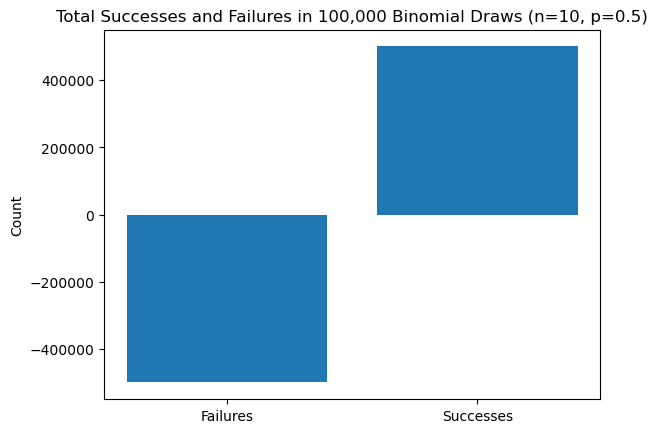

In [325]:
# Create a blank plot.
fig, ax = plt.subplots()

# Create a bar chart.
ax.bar([0, 1], [1000 - total_successes, total_successes])

# Add x labels.
ax.set_xticks([0, 1], labels=['Failures', 'Successes'])

# Add title.
ax.set_title('Total Successes and Failures in 100,000 Binomial Draws (n=10, p=0.5)')

# Add axis label.
ax.set_ylabel('Count');

In [326]:
x2= np.random.binomial(n, p, (num_samples, 2))

# show
x2


array([[8, 3],
       [6, 4],
       [6, 6],
       ...,
       [7, 3],
       [2, 8],
       [5, 6]])

In [327]:
# Count the number of times each value occurs.
uniques, counts = np.unique(x2, return_counts=True)

# Show.
uniques, counts

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([  183,  1967,  8735, 23454, 40868, 49720, 40729, 23296,  8877,
         1967,   204], dtype=int64))

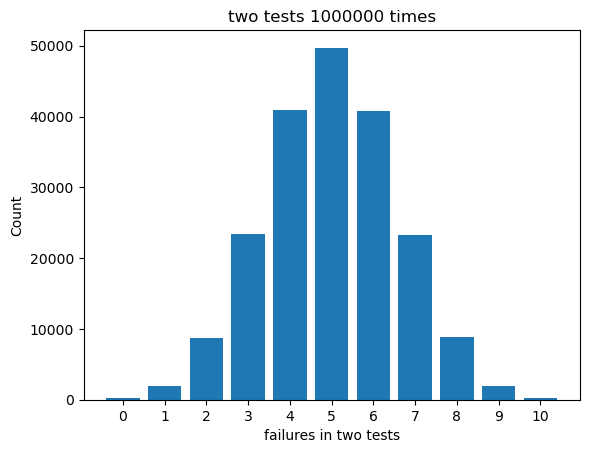

In [328]:
# Create a blank plot.
fig, ax = plt.subplots()

# Create a bar chart.
ax.bar(uniques, counts)

# Set x ticks.
ax.set_xticks(uniques)

# Add title.
ax.set_title('two tests 1000000 times')

# Add axis label.
ax.set_xlabel('failures in two tests')
ax.set_ylabel('Count');

 ## give explanations and insights into your code

## Problem 3: t-Tests

## Simulation of Type II Error

A **Type II error** occurs when a test **fails to reject the null hypothesis** even though it is false.  

We will simulate this scenario for different mean differences \(d = 0, 0.1, 0.2, \dots, 1.0\) using the following procedure:

### Steps

1. **Set parameters**
   - Number of simulations: 1,000
   - Sample size for each group: 100
   - Standard deviation: 1
   - Significance level: 0.05

2. **For each mean difference \(d\):**
   1. Repeat 1,000 times:
      - Draw **Sample A** of size 100 from the standard normal distribution \(N(0,1)\)
      - Draw **Sample B** of size 100 from \(N(d,1)\)
      - Perform an **independent two-sample t-test** comparing Sample A and Sample B
      - Reject the null hypothesis if **p-value < 0.05**
   2. Record the **proportion of times the null hypothesis is not rejected**  
      → This is the **Type II error rate** for that \(d\).

3. **Plot results**
   - X-axis: mean difference \(d\)
   - Y-axis: proportion of times the null hypothesis is not rejected (Type II error rate)
   - Observe how the Type II error rate **decreases** as the mean difference increases.

### Objective

This simulation helps illustrate that as the **difference between group means increases**, the **power of the test increases**, and the **Type II error rate decreases**.


In [329]:
## problem 3: t-Tests
# Author: Finian Doonan

 ## give explanations and insights into your code

## Problem 4: ANOVA

In [330]:
# problem 4: ANOVA
# Author: Finian Doonan

## give explanations and insights into your code

# End